In [13]:
import pandas as pd
import numpy as np
import datetime
from dateutil import parser
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv('raw-data\instagram\js-posts-all\optimal_post_timing2.0.csv')

In [15]:
df.head()

,Unnamed: 0,index,date,caption,comments,likes
0,0,0,2022-03-26 18:33:06,🧡𝐒𝐮𝐧 𝟐𝟕 𝐌𝐚𝐫 | 𝟕.𝟑𝟎𝐩𝐦 @jam.stones @lavvalsg 𝐒𝐡𝐨...,0,54
1,1,1,2022-03-26 18:02:08,𝐒𝐡𝐨𝐩 𝐚𝐭 𝐨𝐮𝐫 𝐬𝐭𝐮𝐝𝐢𝐨 𝐍𝐨𝐰! :𝐃 @newagegaia \r\n*Ap...,0,140
2,2,2,2022-03-24 12:05:49,Prepping our first Bridesmaids Mystery Box ord...,15,124
3,3,3,2022-03-19 17:02:38,🧡𝐒𝐮𝐧 𝟐𝟎 𝐌𝐚𝐫 | 𝟕.𝟑𝟎𝐩𝐦 @jam.stones @lavvalsg 𝐒𝐡...,0,117
4,4,4,2022-03-18 17:30:33,"🌙 𝐒𝐞𝐥𝐞𝐧𝐞 (𝐂𝐚𝐥𝐦𝐧𝐞𝐬𝐬, 𝐏𝐞𝐚𝐜𝐞, 𝐁𝐞𝐚𝐮𝐭𝐲 𝐚𝐧𝐝 𝐅𝐞𝐦𝐚𝐥𝐞 𝐖...",0,96


In [16]:
df["Day of Week"] = df["date"].apply(lambda x: parser.parse(x).strftime('%A'))
df["Hour"] = df["date"].apply(lambda x: parser.parse(x).strftime('%H'))

In [17]:
df.head(10)

,Unnamed: 0,index,date,caption,comments,likes,Day of Week,Hour
0,0,0,2022-03-26 18:33:06,🧡𝐒𝐮𝐧 𝟐𝟕 𝐌𝐚𝐫 | 𝟕.𝟑𝟎𝐩𝐦 @jam.stones @lavvalsg 𝐒𝐡𝐨...,0,54,Saturday,18
1,1,1,2022-03-26 18:02:08,𝐒𝐡𝐨𝐩 𝐚𝐭 𝐨𝐮𝐫 𝐬𝐭𝐮𝐝𝐢𝐨 𝐍𝐨𝐰! :𝐃 @newagegaia \r\n*Ap...,0,140,Saturday,18
2,2,2,2022-03-24 12:05:49,Prepping our first Bridesmaids Mystery Box ord...,15,124,Thursday,12
3,3,3,2022-03-19 17:02:38,🧡𝐒𝐮𝐧 𝟐𝟎 𝐌𝐚𝐫 | 𝟕.𝟑𝟎𝐩𝐦 @jam.stones @lavvalsg 𝐒𝐡...,0,117,Saturday,17
4,4,4,2022-03-18 17:30:33,"🌙 𝐒𝐞𝐥𝐞𝐧𝐞 (𝐂𝐚𝐥𝐦𝐧𝐞𝐬𝐬, 𝐏𝐞𝐚𝐜𝐞, 𝐁𝐞𝐚𝐮𝐭𝐲 𝐚𝐧𝐝 𝐅𝐞𝐦𝐚𝐥𝐞 𝐖...",0,96,Friday,17
5,5,5,2022-03-16 21:25:18,"🌈𝐑𝐚𝐢𝐧𝐛𝐨𝐰 ( 𝐂𝐚𝐫𝐞𝐞𝐫, 𝐂𝐨𝐧𝐟𝐢𝐝𝐞𝐧𝐜𝐞, 𝐋𝐨𝐯𝐞, 𝐆𝐫𝐨𝐰𝐭𝐡, 𝐖...",6,111,Wednesday,21
6,6,6,2022-03-14 16:50:00,🌼𝐉𝐞𝐰𝐞𝐥𝐫𝐲 𝐌𝐲𝐬𝐭𝐞𝐫𝐲 𝐁𝐨𝐱✨\r\n*$5 off vouchers up f...,0,64,Monday,16
7,7,7,2022-03-13 12:20:24,🧡𝐒𝐮𝐧 𝟏𝟑 𝐌𝐚𝐫 | 𝟕.𝟑𝟎𝐩𝐦 *𝐓𝐎𝐍𝐈𝐆𝐇𝐓* @jam.stones @la...,0,108,Sunday,12
8,8,8,2022-03-11 17:11:04,𝐁𝐥𝐮𝐞 𝐒𝐡𝐞𝐞𝐧 𝐌𝐨𝐨𝐧𝐬𝐭𝐨𝐧𝐞\r\nIt promotes intuition ...,0,76,Friday,17
9,9,9,2022-03-09 20:51:27,For the Agate lovers !!! 😍😍😍\r\n* prices befor...,2,73,Wednesday,20


In [18]:
df_jamstone = df[["comments","likes","date","caption","Day of Week","Hour"]]

df_jamstone

,comments,likes,date,caption,Day of Week,Hour
0,0,54,2022-03-26 18:33:06,🧡𝐒𝐮𝐧 𝟐𝟕 𝐌𝐚𝐫 | 𝟕.𝟑𝟎𝐩𝐦 @jam.stones @lavvalsg 𝐒𝐡𝐨...,Saturday,18
1,0,140,2022-03-26 18:02:08,𝐒𝐡𝐨𝐩 𝐚𝐭 𝐨𝐮𝐫 𝐬𝐭𝐮𝐝𝐢𝐨 𝐍𝐨𝐰! :𝐃 @newagegaia \r\n*Ap...,Saturday,18
2,15,124,2022-03-24 12:05:49,Prepping our first Bridesmaids Mystery Box ord...,Thursday,12
3,0,117,2022-03-19 17:02:38,🧡𝐒𝐮𝐧 𝟐𝟎 𝐌𝐚𝐫 | 𝟕.𝟑𝟎𝐩𝐦 @jam.stones @lavvalsg 𝐒𝐡...,Saturday,17
4,0,96,2022-03-18 17:30:33,"🌙 𝐒𝐞𝐥𝐞𝐧𝐞 (𝐂𝐚𝐥𝐦𝐧𝐞𝐬𝐬, 𝐏𝐞𝐚𝐜𝐞, 𝐁𝐞𝐚𝐮𝐭𝐲 𝐚𝐧𝐝 𝐅𝐞𝐦𝐚𝐥𝐞 𝐖...",Friday,17
...,...,...,...,...,...,...
598,0,21,2020-04-12 21:05:29,A Z U R E\r\n\r\n#crystals #crystaljewelry #sh...,Sunday,21
599,0,22,2020-04-12 21:04:33,A Q U A R I U S \r\n#crystals #crystaljewelry ...,Sunday,21
600,0,22,2020-04-12 21:01:14,A V E R Y\r\n\r\n#crystals #crystaljewelry #sh...,Sunday,21
601,0,22,2020-04-12 21:00:31,A R T I C\r\n\r\n#crystals #crystaljewelry #sh...,Sunday,21


In [19]:
df_jamstone_no_giveaway = df[df["caption"].str.contains("giveaway") == False]
df_jamstone_no_giveaway

,Unnamed: 0,index,date,caption,comments,likes,Day of Week,Hour
0,0,0,2022-03-26 18:33:06,🧡𝐒𝐮𝐧 𝟐𝟕 𝐌𝐚𝐫 | 𝟕.𝟑𝟎𝐩𝐦 @jam.stones @lavvalsg 𝐒𝐡𝐨...,0,54,Saturday,18
1,1,1,2022-03-26 18:02:08,𝐒𝐡𝐨𝐩 𝐚𝐭 𝐨𝐮𝐫 𝐬𝐭𝐮𝐝𝐢𝐨 𝐍𝐨𝐰! :𝐃 @newagegaia \r\n*Ap...,0,140,Saturday,18
2,2,2,2022-03-24 12:05:49,Prepping our first Bridesmaids Mystery Box ord...,15,124,Thursday,12
3,3,3,2022-03-19 17:02:38,🧡𝐒𝐮𝐧 𝟐𝟎 𝐌𝐚𝐫 | 𝟕.𝟑𝟎𝐩𝐦 @jam.stones @lavvalsg 𝐒𝐡...,0,117,Saturday,17
4,4,4,2022-03-18 17:30:33,"🌙 𝐒𝐞𝐥𝐞𝐧𝐞 (𝐂𝐚𝐥𝐦𝐧𝐞𝐬𝐬, 𝐏𝐞𝐚𝐜𝐞, 𝐁𝐞𝐚𝐮𝐭𝐲 𝐚𝐧𝐝 𝐅𝐞𝐦𝐚𝐥𝐞 𝐖...",0,96,Friday,17
...,...,...,...,...,...,...,...,...
598,598,598,2020-04-12 21:05:29,A Z U R E\r\n\r\n#crystals #crystaljewelry #sh...,0,21,Sunday,21
599,599,599,2020-04-12 21:04:33,A Q U A R I U S \r\n#crystals #crystaljewelry ...,0,22,Sunday,21
600,600,600,2020-04-12 21:01:14,A V E R Y\r\n\r\n#crystals #crystaljewelry #sh...,0,22,Sunday,21
601,601,601,2020-04-12 21:00:31,A R T I C\r\n\r\n#crystals #crystaljewelry #sh...,0,22,Sunday,21


In [20]:
df_jamstone_giveaway = df[df["caption"].str.contains("giveaway") == True]

df_jamstone_giveaway

,Unnamed: 0,index,date,caption,comments,likes,Day of Week,Hour
67,67,67,2021-10-16 12:38:30,G I V E A W A Y ⚡️\r\nAnyone needs a boost in ...,541,261,Saturday,12
157,157,157,2021-07-03 12:15:36,Congratulations \r\n@jaimefoodlover @ernyseee ...,960,385,Saturday,12
164,164,164,2021-06-19 21:33:27,Congrats @carissaeu12 @ginny0913 💓💓\r\n@petals...,730,353,Saturday,21
206,206,206,2021-05-02 12:07:28,Congratulations @melinateo 🙆🏻‍♀️🥰💕!!!! \r\n\r\...,415,-1,Sunday,12
236,236,236,2021-03-29 12:04:43,✨GIVEAWAY✨\r\nHello Ladies! Before the month o...,471,336,Monday,12
505,505,505,2020-08-21 17:13:17,Hello everyone!!!! I am back with another give...,439,239,Friday,17
506,506,506,2020-08-21 15:38:49,Stand a chance to win this exclusive Larimar B...,4,78,Friday,15
507,507,507,2020-08-16 10:51:10,Happy Sunday Ladies!!!!🙆🏻‍♀️✨I’m really happy ...,11,137,Sunday,10
575,575,575,2020-04-27 17:03:47,✨ GIVEAWAY✨\r\nCrystal brings lots of good vib...,308,164,Monday,17


In [21]:
df_jamstone_no_giveaway = df_jamstone_no_giveaway[["comments","likes","Day of Week","Hour"]]

df_jamstone_giveaway = df_jamstone_giveaway[["comments","likes","Day of Week","Hour"]]

In [22]:
df_jamstone_no_giveaway_sort_likes = df_jamstone_no_giveaway.groupby(["Day of Week","Hour"]).mean().sort_values(by=["likes"], ascending=False)

df_jamstone_no_giveaway_sort_likes

comments       likes
Day of Week Hour                       
Thursday    09     4.000000  208.000000
Tuesday     11    16.000000  197.500000
            08    11.000000  159.000000
Saturday    23    11.625000  156.250000
Thursday    17    19.333333  149.666667
...                     ...         ...
Wednesday   12     1.000000   38.285714
Saturday    01     0.666667   33.555556
Sunday      21     0.500000   32.375000
Friday      23     0.125000   31.000000
Saturday    00     0.285714   30.214286

[97 rows x 2 columns]

In [23]:
df_jamstone_giveaway_sort_likes = df_jamstone_giveaway.groupby(["Day of Week","Hour"]).mean().sort_values(by=["likes"], ascending=False)

df_jamstone_giveaway_sort_likes

,,comments,likes
Day of Week,Hour,,
Saturday,21,730.0,353.0
Monday,12,471.0,336.0
Saturday,12,750.5,323.0
Friday,17,439.0,239.0
Monday,17,308.0,164.0
Sunday,10,11.0,137.0
Friday,15,4.0,78.0
Sunday,12,415.0,-1.0


In [24]:
df_jamstone_no_giveaway_sort_comments = df_jamstone_no_giveaway.groupby(["Day of Week","Hour"]).mean().sort_values(by=["comments"], ascending=False)

df_jamstone_no_giveaway_sort_comments

comments       likes
Day of Week Hour                       
Monday      11    44.750000   52.750000
Thursday    21    27.000000   66.200000
            19    23.000000  143.333333
            17    19.333333  149.666667
Tuesday     11    16.000000  197.500000
...                     ...         ...
Monday      16     0.000000   74.500000
Saturday    09     0.000000   42.000000
            13     0.000000   53.000000
Tuesday     18     0.000000   44.666667
Sunday      09     0.000000   74.500000

[97 rows x 2 columns]

In [25]:
df_jamstone_giveaway_sort_comments = df_jamstone_giveaway.groupby(["Day of Week","Hour"]).mean().sort_values(by=["comments"], ascending=False)

df_jamstone_giveaway_sort_comments

comments  likes
Day of Week Hour                 
Saturday    12       750.5  323.0
            21       730.0  353.0
Monday      12       471.0  336.0
Friday      17       439.0  239.0
Sunday      12       415.0   -1.0
Monday      17       308.0  164.0
Sunday      10        11.0  137.0
Friday      15         4.0   78.0

Graphs

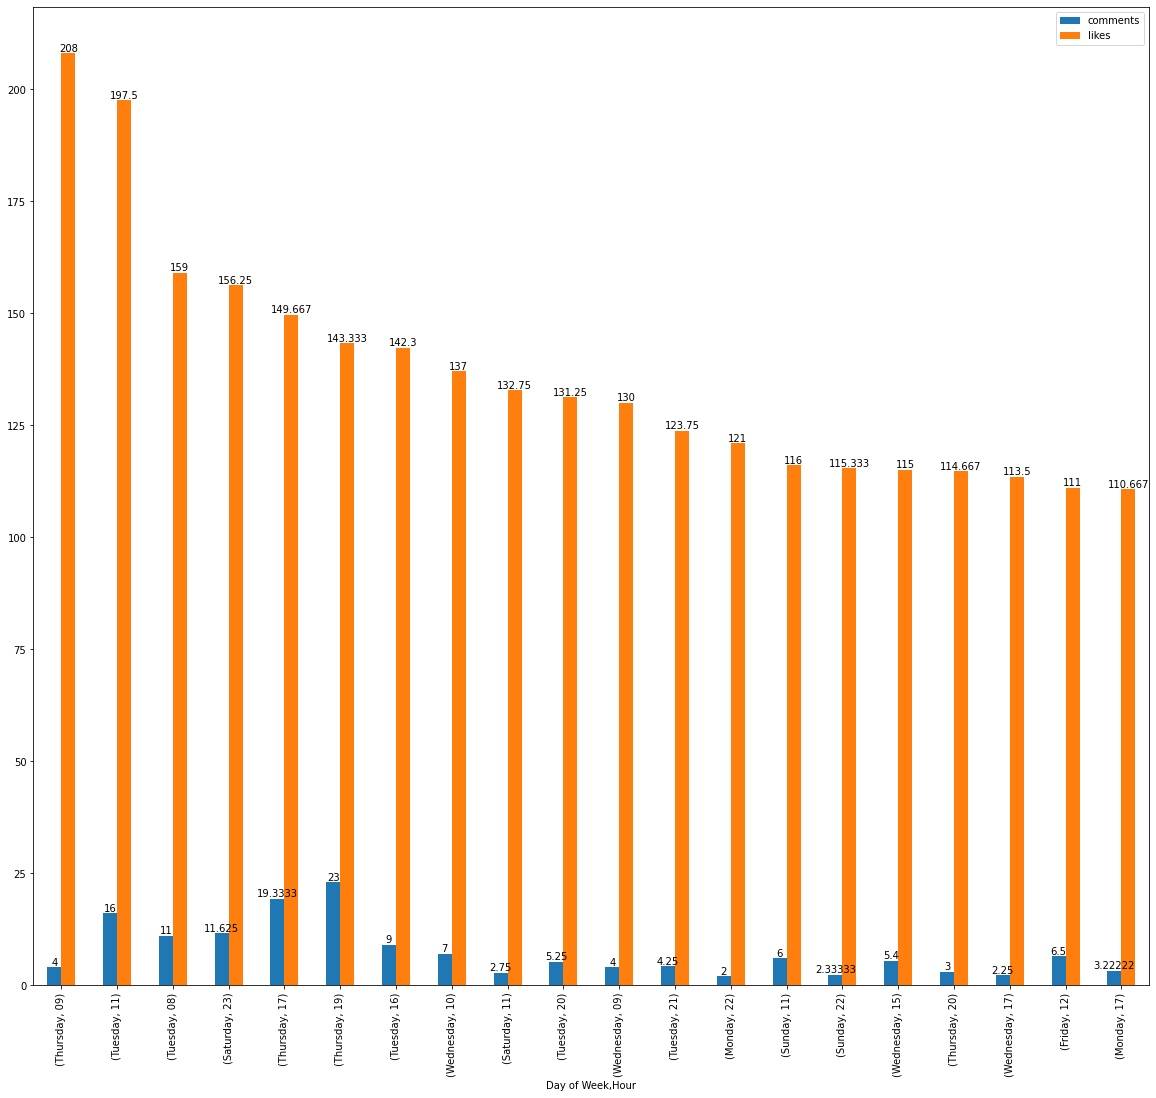

In [26]:
ax_df_jamstone_no_giveaway_sort_likes = df_jamstone_no_giveaway_sort_likes.head(20).plot.bar(y=["comments","likes"], figsize=(20,18))

for container in ax_df_jamstone_no_giveaway_sort_likes.containers:
    ax_df_jamstone_no_giveaway_sort_likes.bar_label(container)

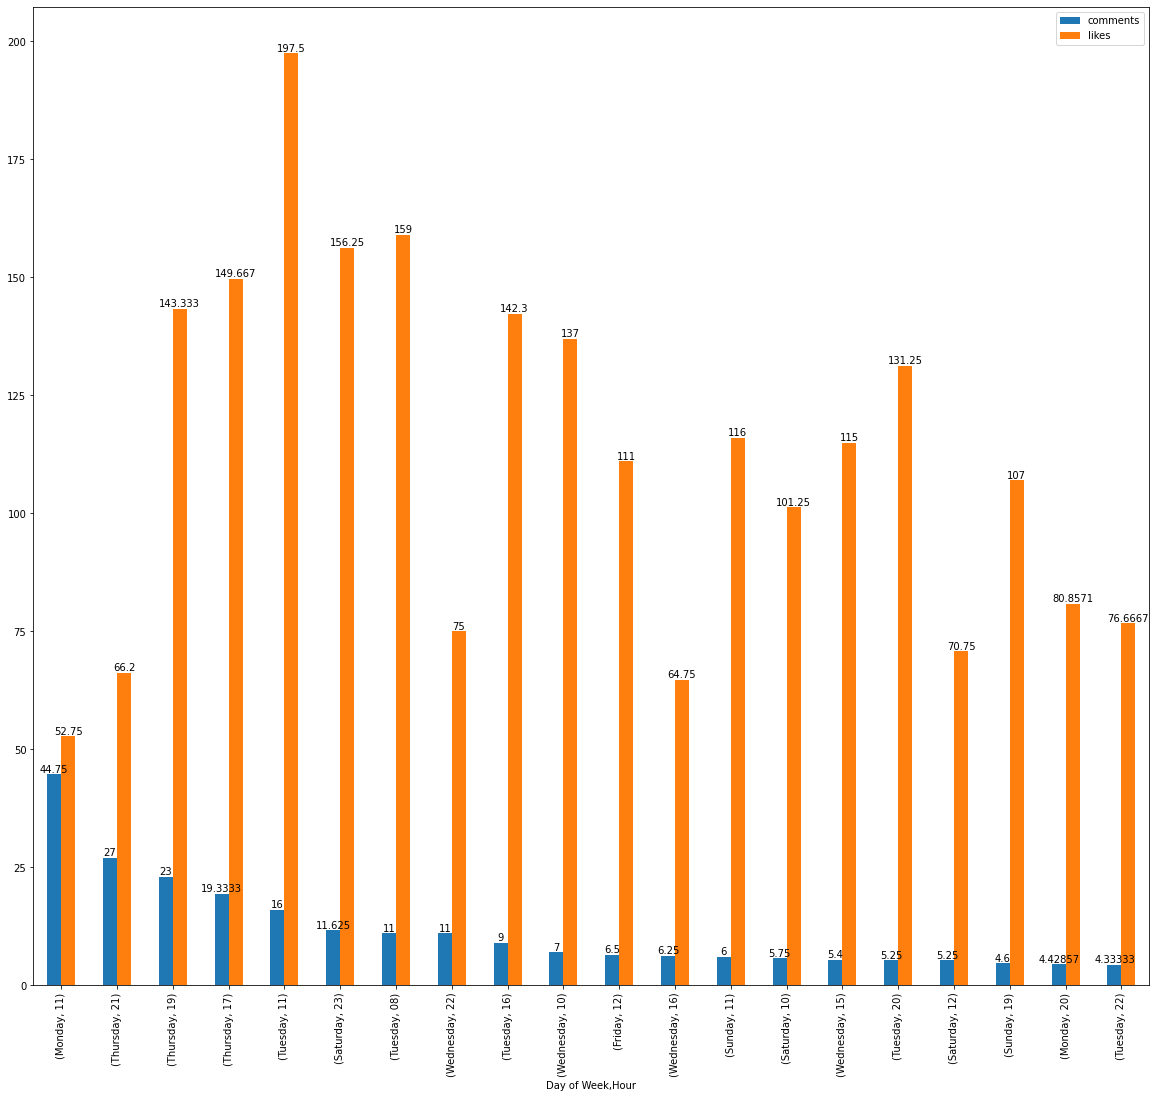

In [27]:
ax_df_jamstone_no_giveaway_sort_comments = df_jamstone_no_giveaway_sort_comments.head(20).plot.bar(y=["comments","likes"], figsize=(20,18))

for container in ax_df_jamstone_no_giveaway_sort_comments.containers:
    ax_df_jamstone_no_giveaway_sort_comments.bar_label(container)

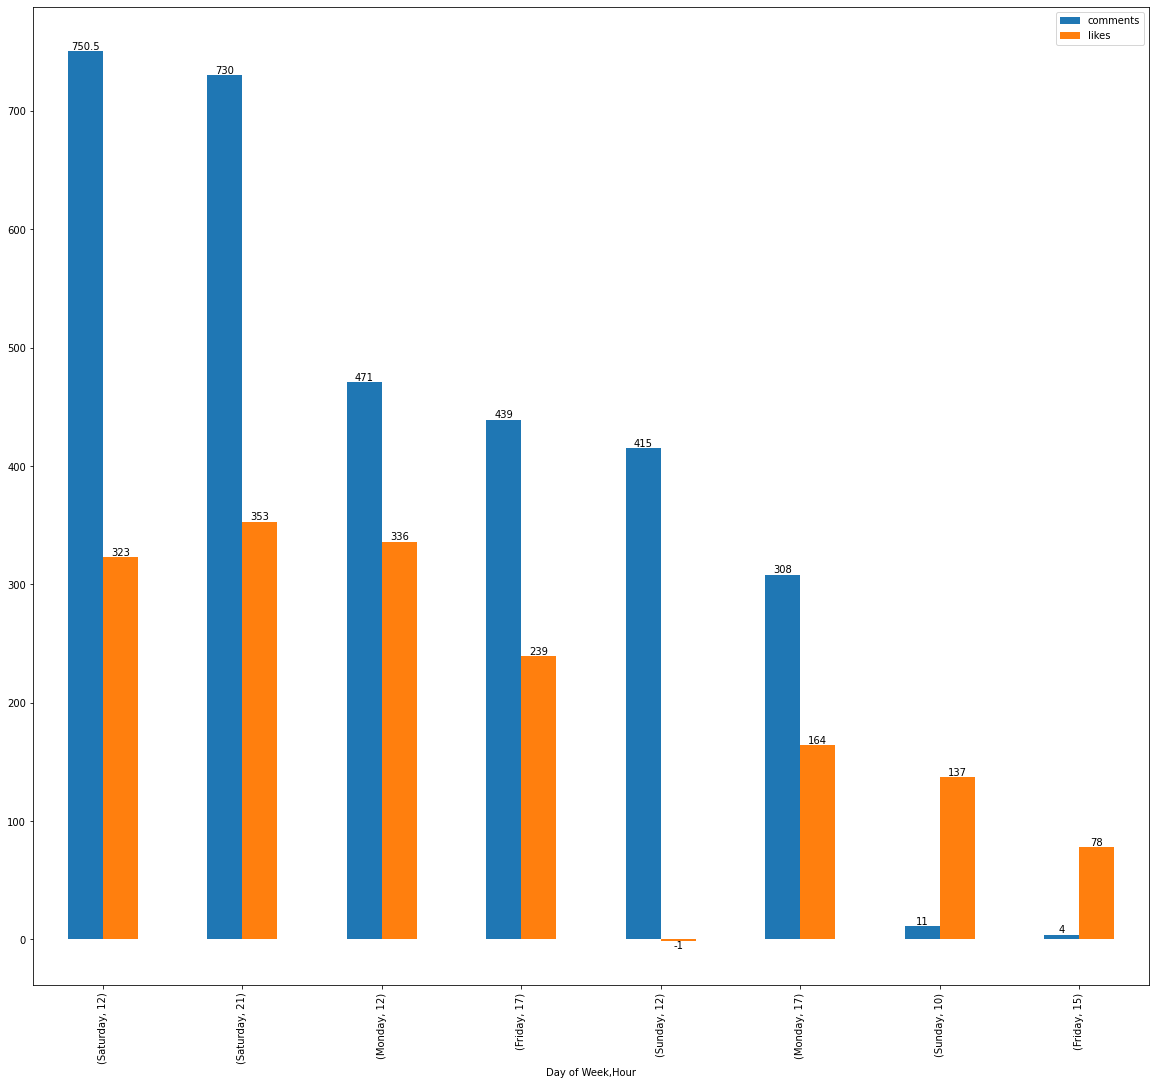

In [28]:
ax_df_jamstone_giveaway_sort_comments = df_jamstone_giveaway_sort_comments.head(20).plot.bar(y=["comments","likes"], figsize=(20,18))

for container in ax_df_jamstone_giveaway_sort_comments.containers:
    ax_df_jamstone_giveaway_sort_comments.bar_label(container)

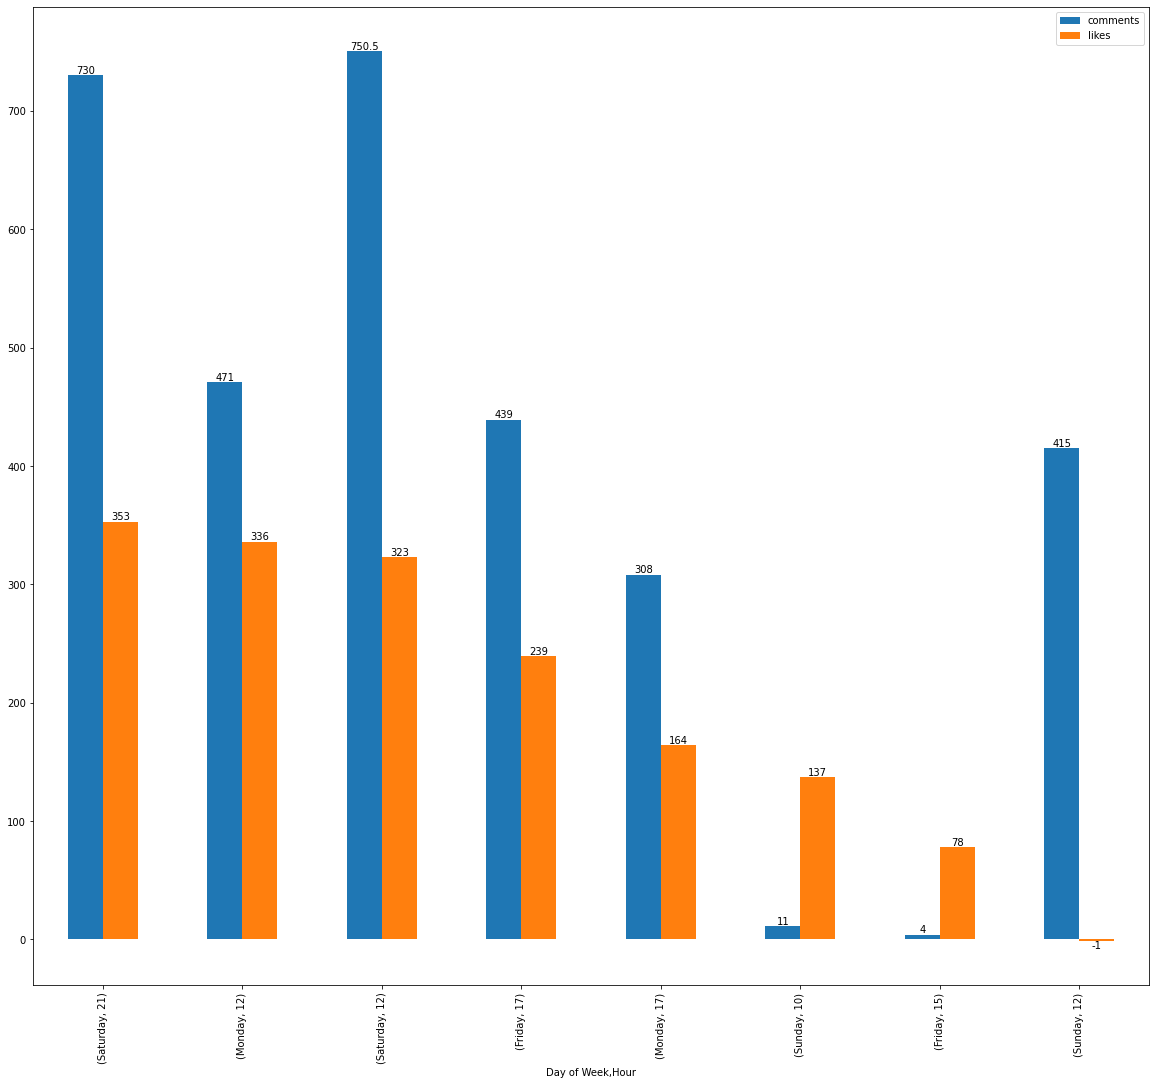

In [29]:
ax_df_jamstone_giveaway_sort_likes = df_jamstone_giveaway_sort_likes.head(20).plot.bar(y=["comments","likes"], figsize=(20,18))

for container in ax_df_jamstone_giveaway_sort_likes.containers:
    ax_df_jamstone_giveaway_sort_likes.bar_label(container)

In [30]:
df_jamstone_no_giveaway_sort_comments.to_csv("jamstone_no_giveaway_sort_comments.csv")

In [31]:
df_jamstone_no_giveaway_sort_likes.to_csv("jamstone_no_giveaway_sort_likes.csv")

In [32]:
df_jamstone_giveaway_sort_likes.to_csv("jamstone_giveaway_sort_likes.csv")

In [33]:
df_jamstone_giveaway_sort_comments.to_csv("jamstone_giveaway_sort_comments.csv")